# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
outliers_utils.visualize_outliers_specific(df, 'age')

no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


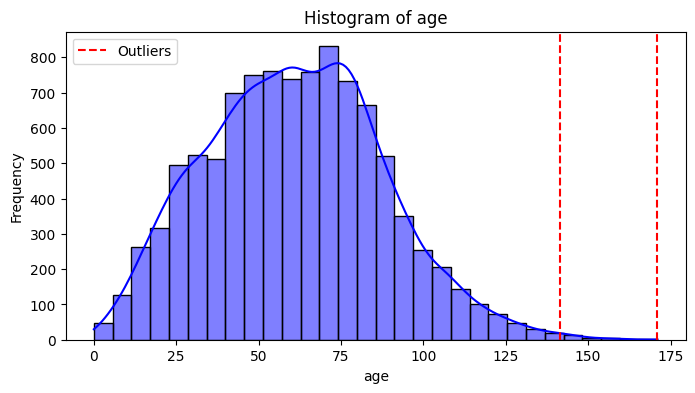

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3459
           1       0.97      0.99      0.98      3529

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1510
           1       0.92      0.99      0.95      1486

    accuracy                           0.95      2996
   macro avg       0.96      0.95      0.95      2996
weighted avg       0.96      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4999
           1       0.95      0.99      0.97      4985

    accuracy                           0.97      9984


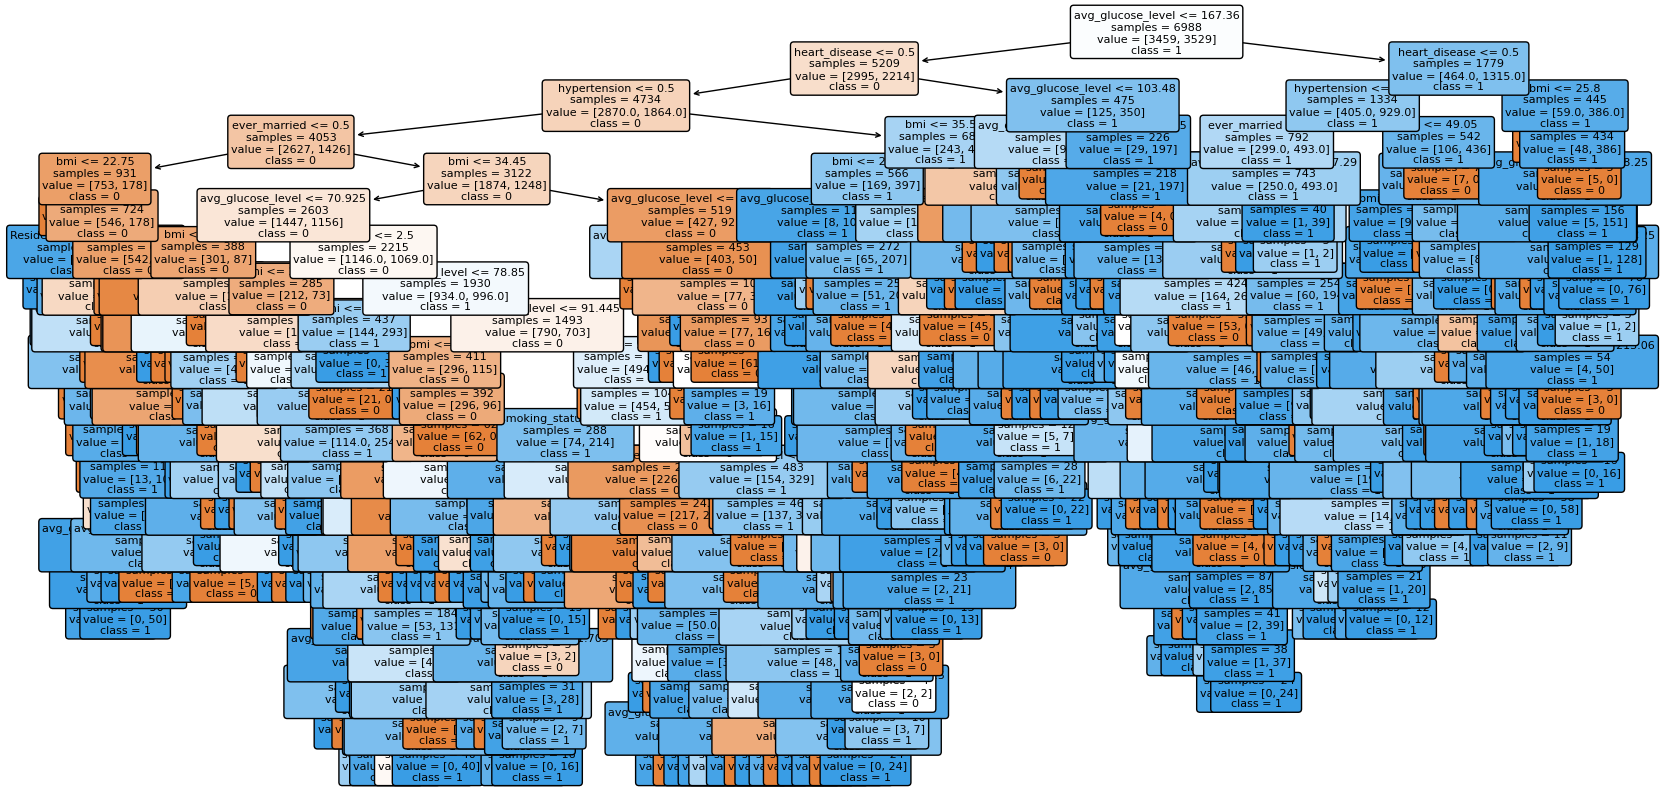

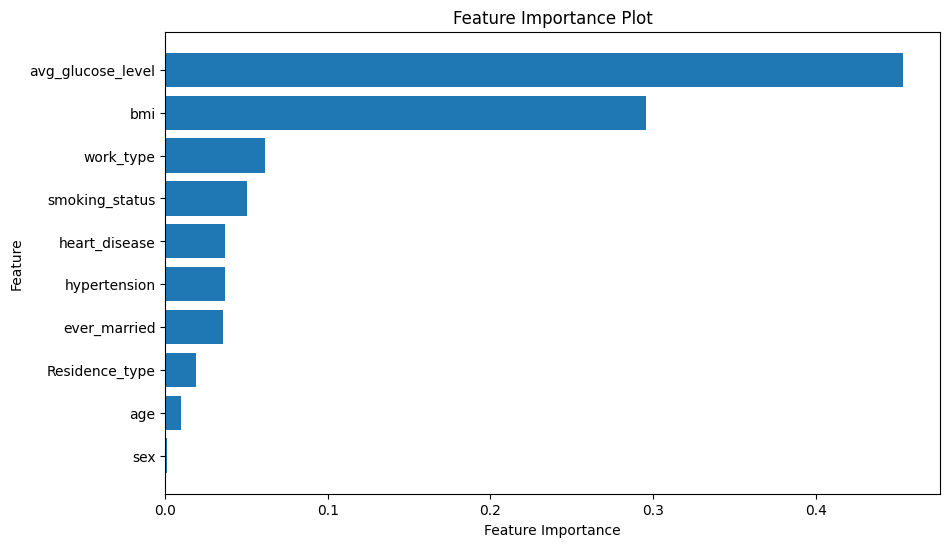

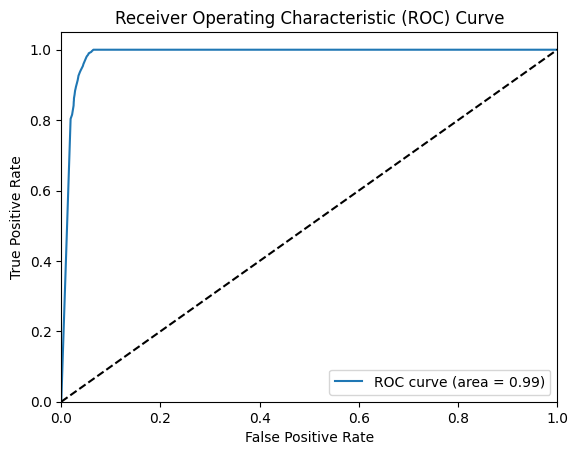

AUC Score: 0.9857162204757902


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9685264663805436, 0.9699570815450643, 0.9642346208869814, 0.9556509298998569, 0.9699570815450643, 0.944206008583691, 0.9656652360515021, 0.9613733905579399, 0.9656160458452722, 0.9641833810888252]
Mean accuracy: 0.9629370242384739
95% confidence interval: (0.9573242966940396, 0.9685497517829083)


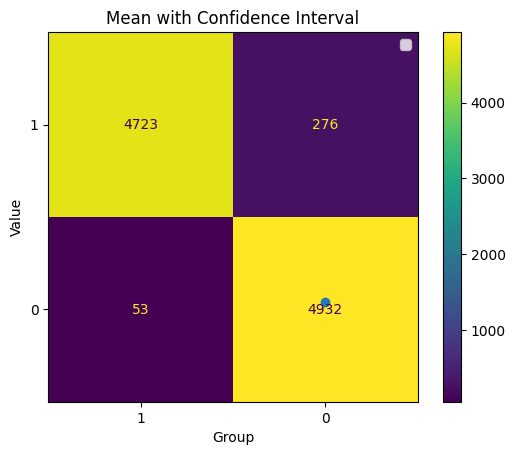

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 41.081451416015625
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'max_iter': 233, 'min_samples_leaf': 18}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3459
           1       1.00      1.00      1.00      3529

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1510
           1       0.98      1.00      0.99      1486

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996

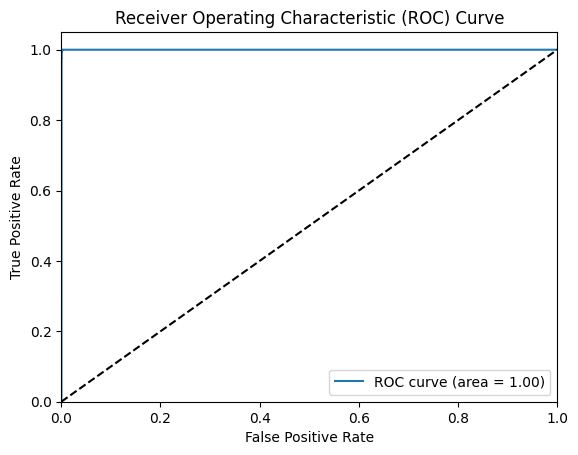

AUC Score: 0.9995737161474421


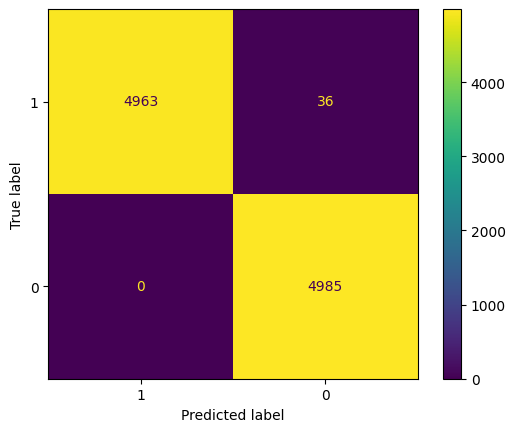

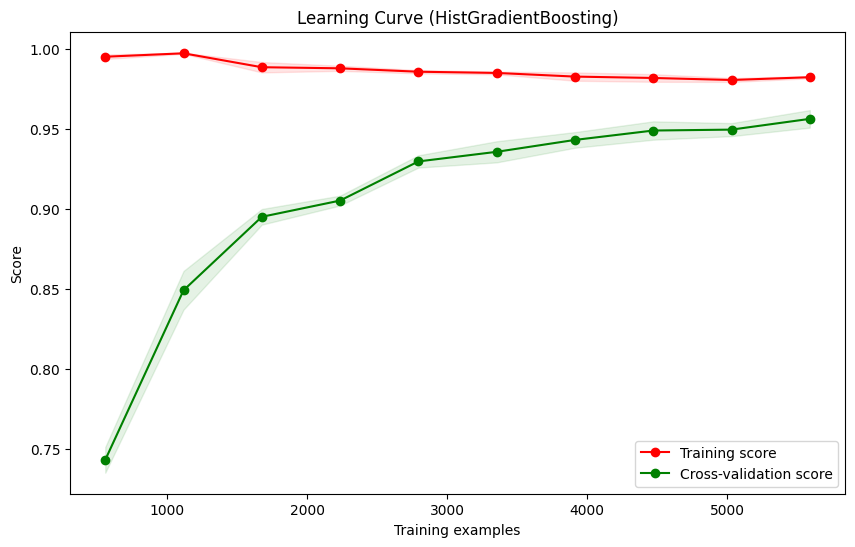

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9885550786838341, 0.9885550786838341, 0.994277539341917, 0.9871244635193133, 0.9856938483547926, 0.9899856938483548, 0.9828326180257511, 0.9856938483547926, 0.9928366762177651, 0.9914040114613181]
Mean accuracy: 0.9886958856491672
95% confidence interval: (0.9861699796621958, 0.9912217916361387)


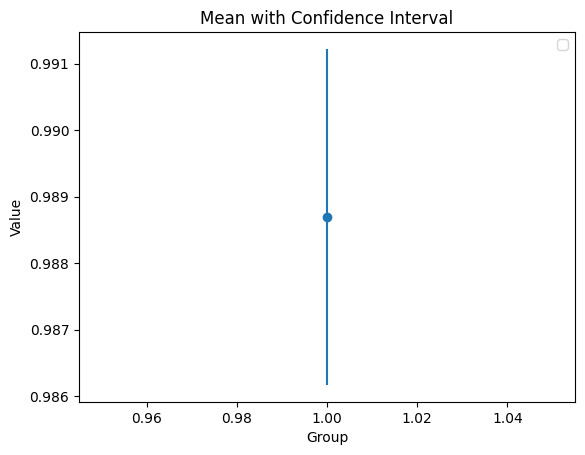

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


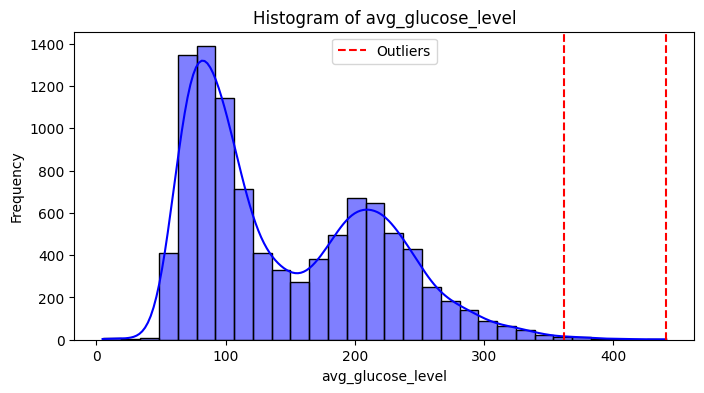

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3478
           1       0.88      0.91      0.89      3510

    accuracy                           0.89      6988
   macro avg       0.89      0.89      0.89      6988
weighted avg       0.89      0.89      0.89      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1534
           1       0.82      0.87      0.84      1462

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4999
           1       0.88      0.92      0.90      4985

    accuracy                           0.90      9984


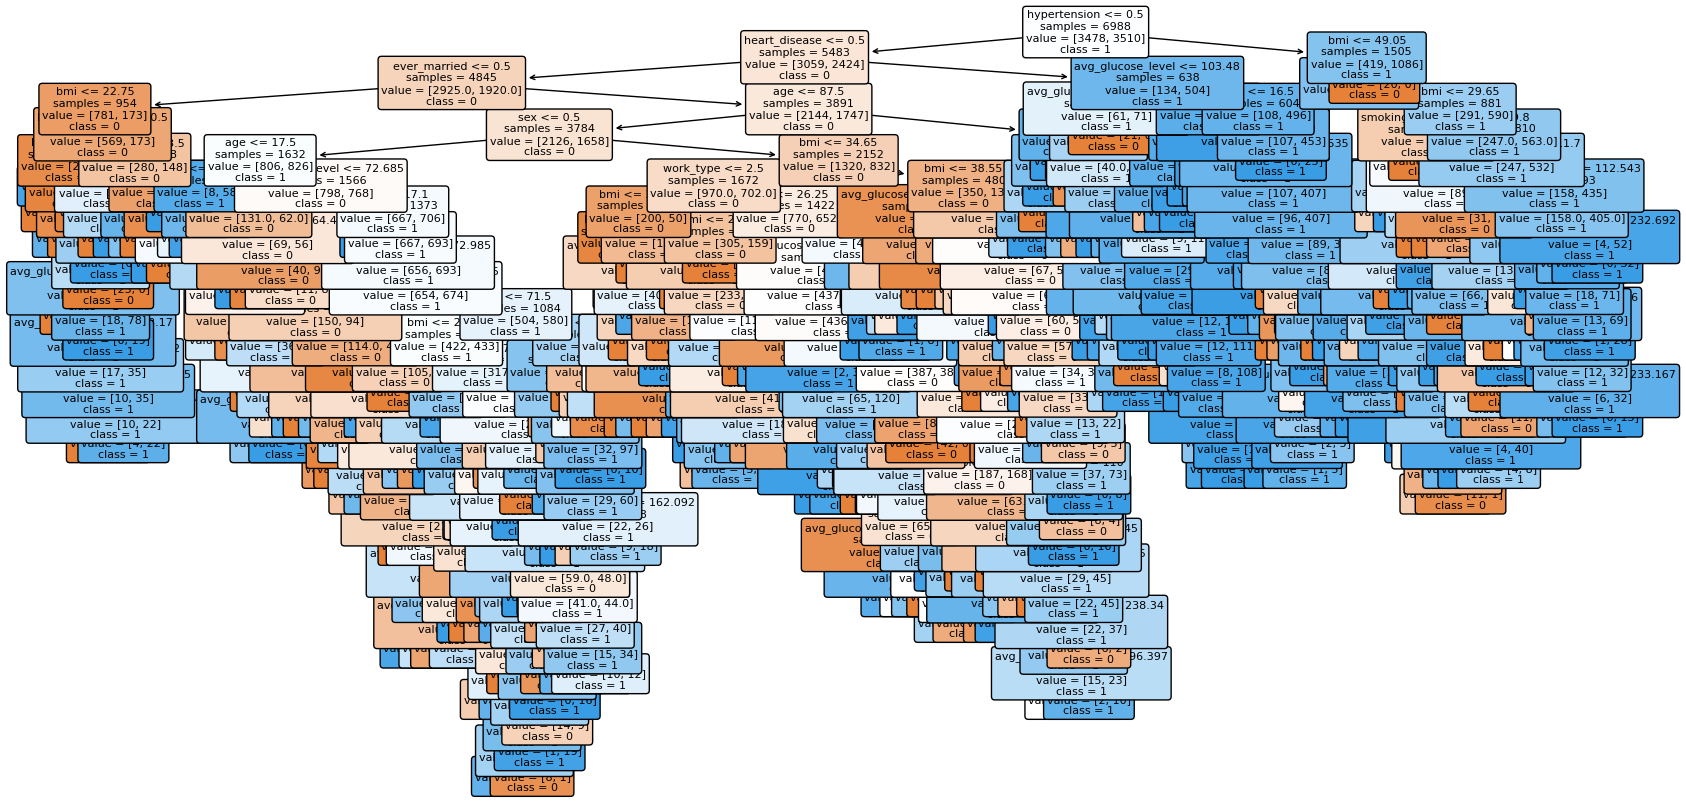

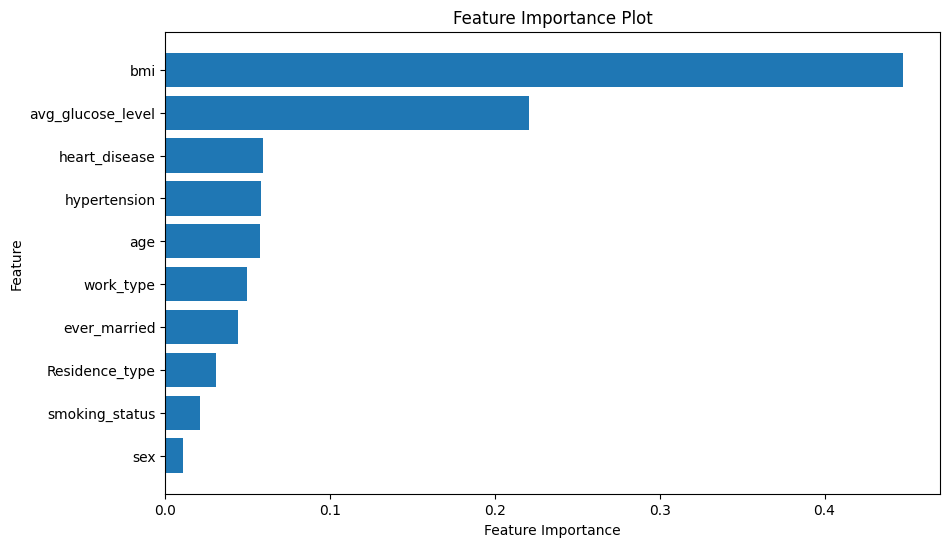

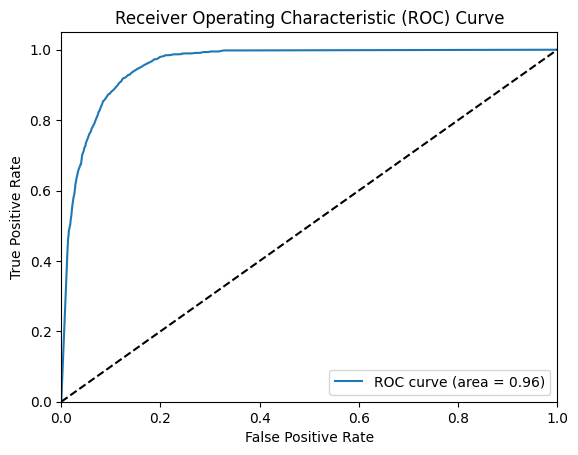

AUC Score: 0.9584835322129623


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7968526466380543, 0.8183118741058655, 0.8683834048640916, 0.8326180257510729, 0.8226037195994278, 0.7997138769670958, 0.7954220314735336, 0.8068669527896996, 0.8094555873925502, 0.8481375358166189]
Mean accuracy: 0.819836565539801
95% confidence interval: (0.8027471426484613, 0.8369259884311407)


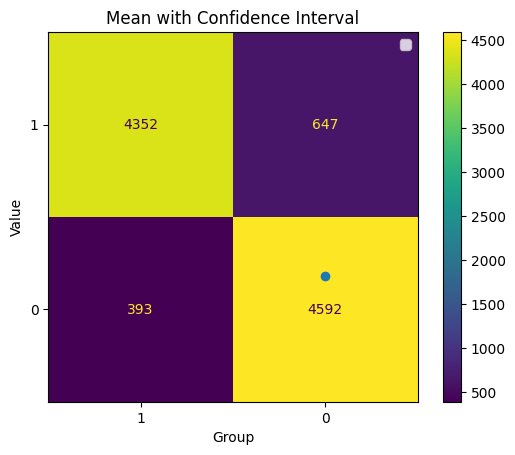

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 38.571988582611084
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 447, 'min_samples_leaf': 1}
Best score on training data:  0.962962962962963
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3478
           1       1.00      1.00      1.00      3510

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1534
           1       0.94      0.96      0.95      1462

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0

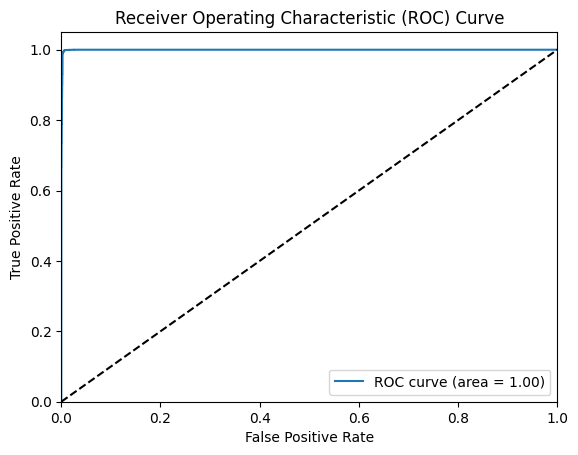

AUC Score: 0.9994663325844707


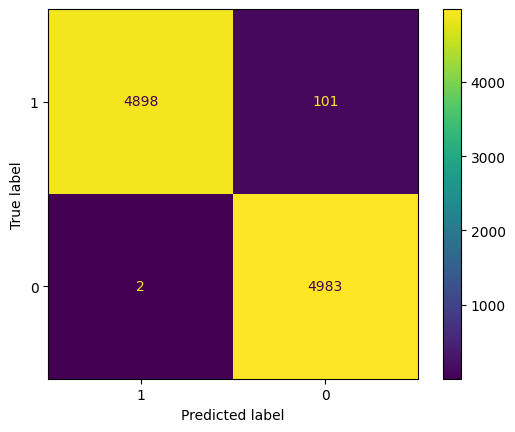

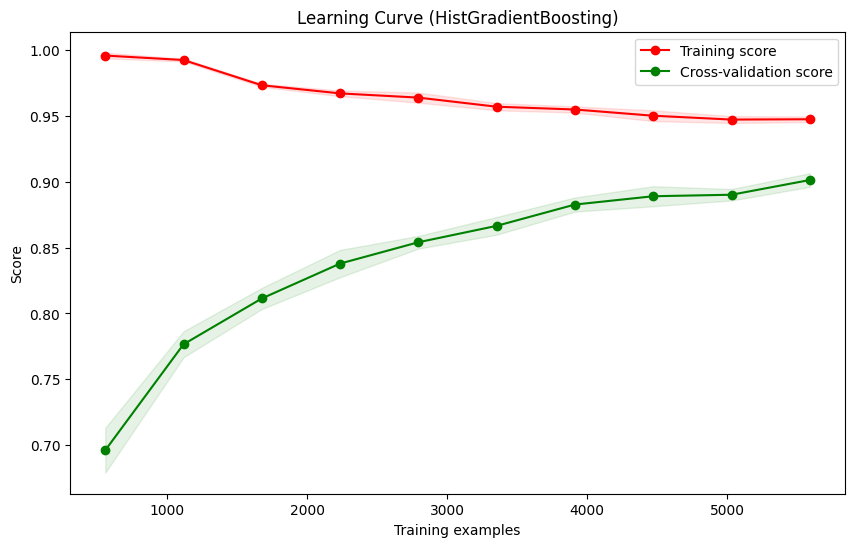

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9356223175965666, 0.949928469241774, 0.9427753934191703, 0.9341917024320457, 0.9527896995708155, 0.9542203147353362, 0.9513590844062947, 0.9456366237482118, 0.9469914040114613, 0.9699140401146131]
Mean accuracy: 0.9483429049276288
95% confidence interval: (0.9410575696268698, 0.9556282402283879)


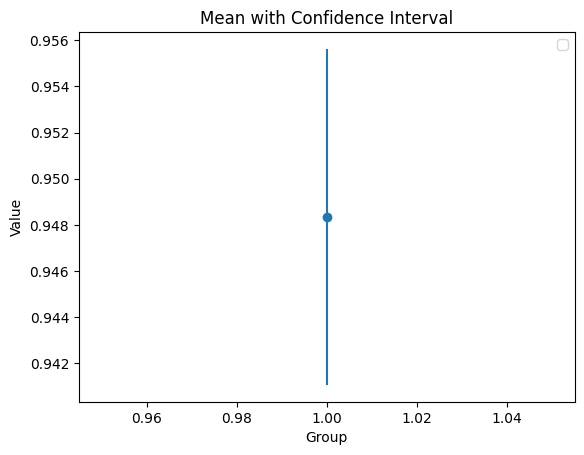

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

Outliers found:


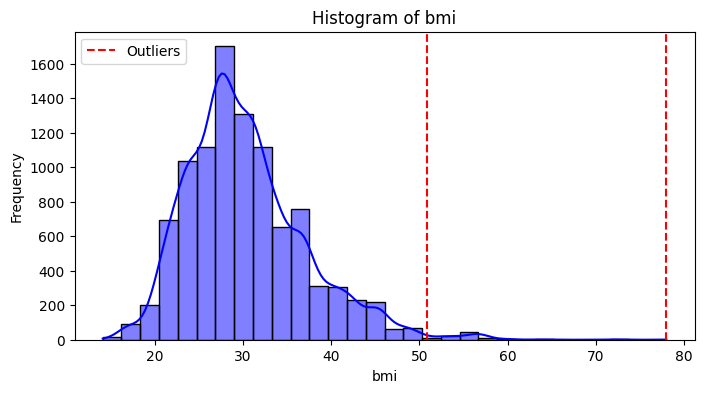

In [15]:
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


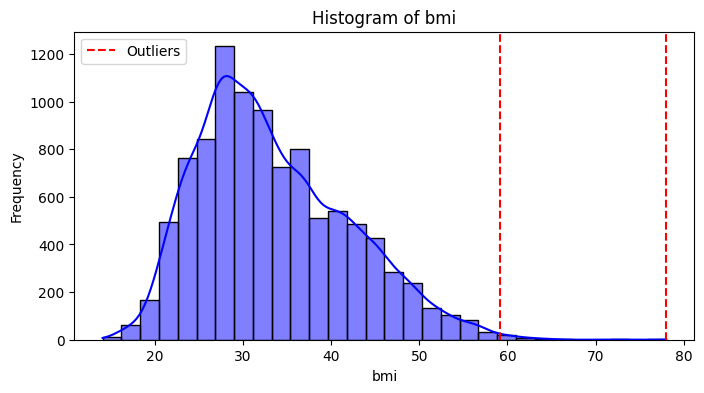

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3492
           1       0.95      0.97      0.96      3496

    accuracy                           0.96      6988
   macro avg       0.96      0.96      0.96      6988
weighted avg       0.96      0.96      0.96      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1514
           1       0.89      0.93      0.91      1482

    accuracy                           0.91      2996
   macro avg       0.91      0.91      0.91      2996
weighted avg       0.91      0.91      0.91      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4999
           1       0.92      0.99      0.96      4985

    accuracy                           0.95      9984


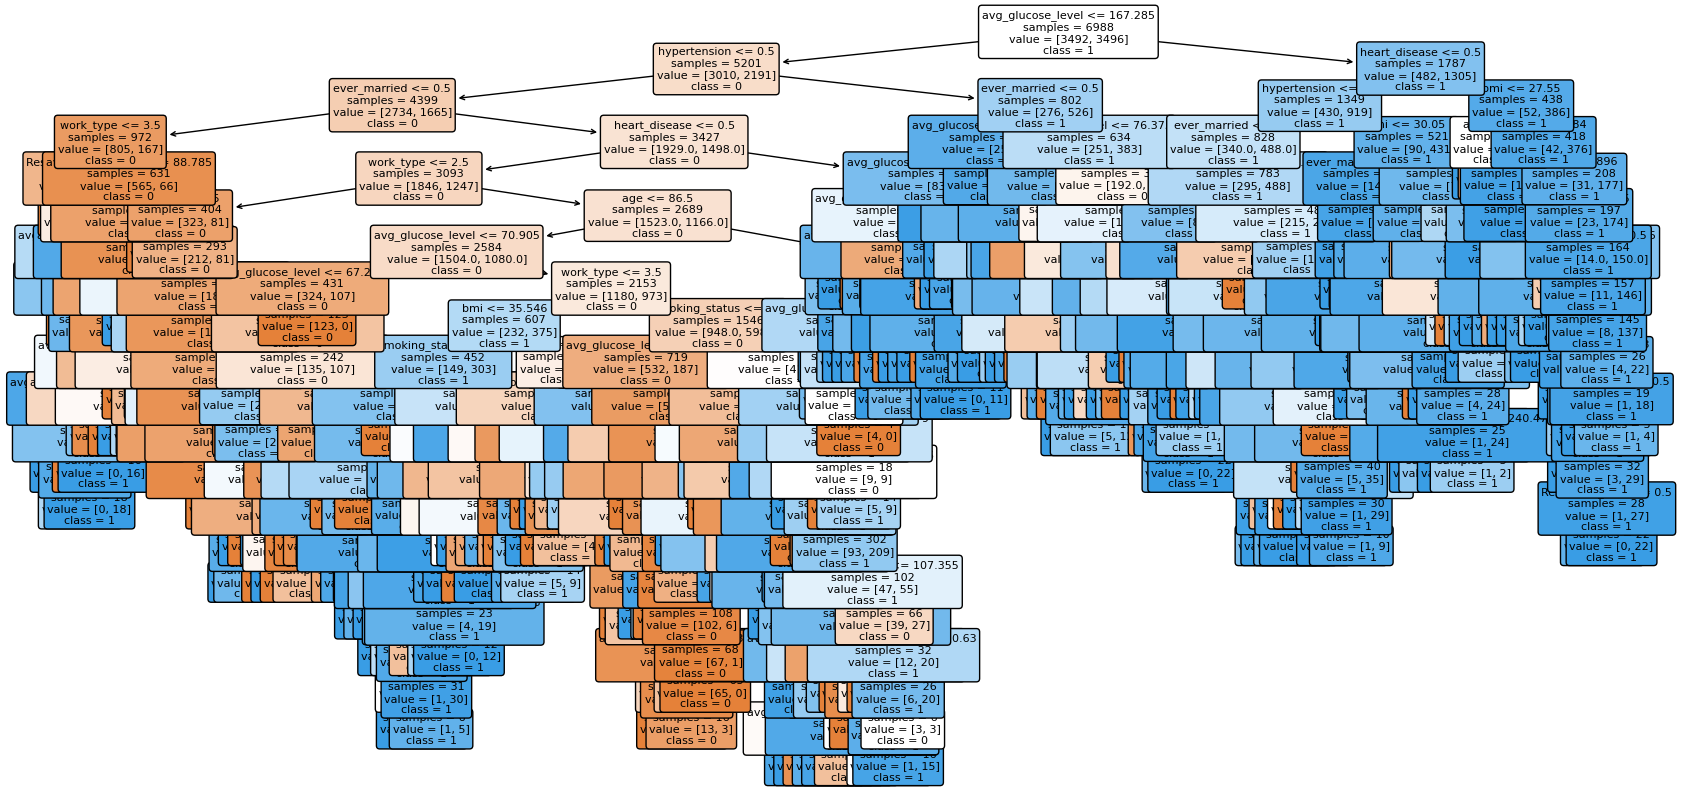

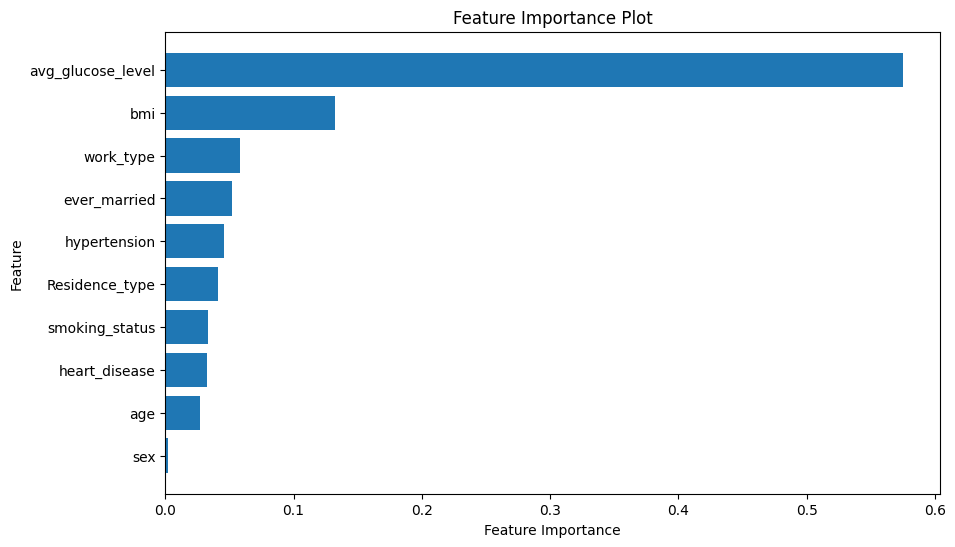

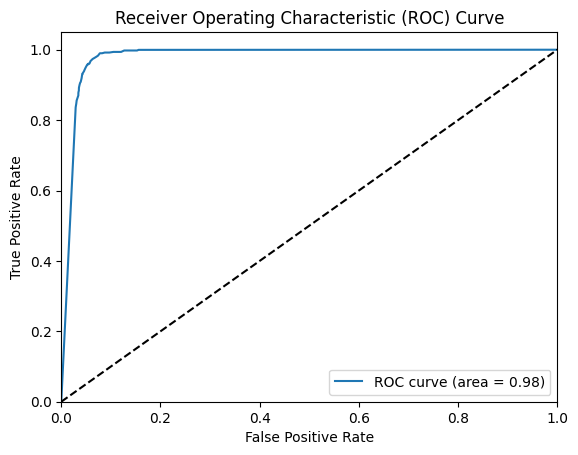

AUC Score: 0.9797880940280332


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9084406294706724, 0.9055793991416309, 0.8655221745350501, 0.9227467811158798, 0.9198855507868383, 0.9170243204577968, 0.9012875536480687, 0.8855507868383404, 0.9197707736389685, 0.8968481375358166]
Mean accuracy: 0.9042656107169063
95% confidence interval: (0.8913735773049224, 0.9171576441288901)


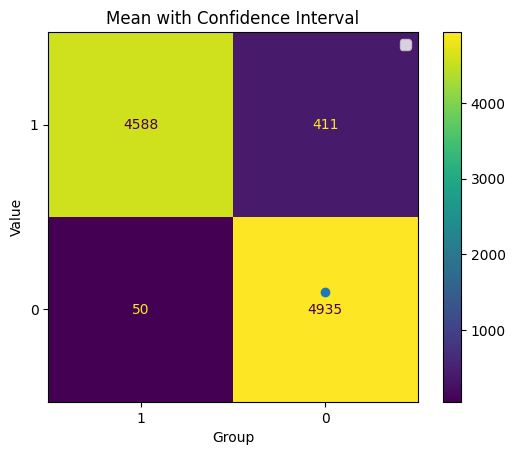

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)


**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 39.866047859191895
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 400, 'min_samples_leaf': 2}
Best score on training data:  0.9776918046188433
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3492
           1       1.00      1.00      1.00      3496

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1514
           1       0.95      0.98      0.97      1482

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      

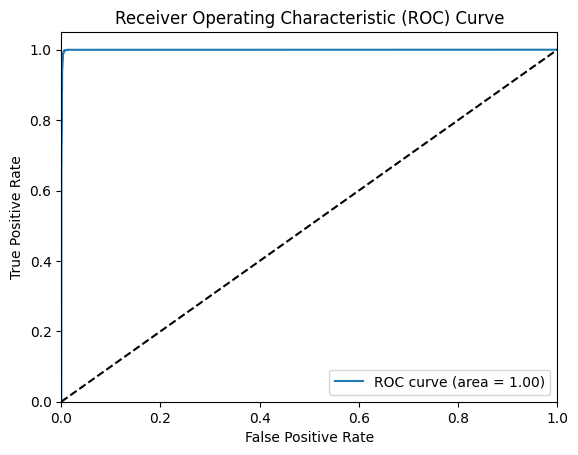

AUC Score: 0.9994838285610983


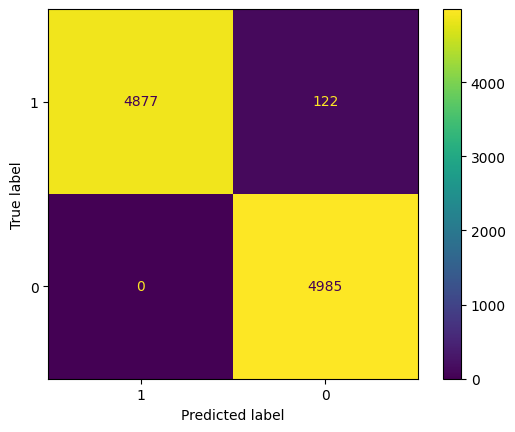

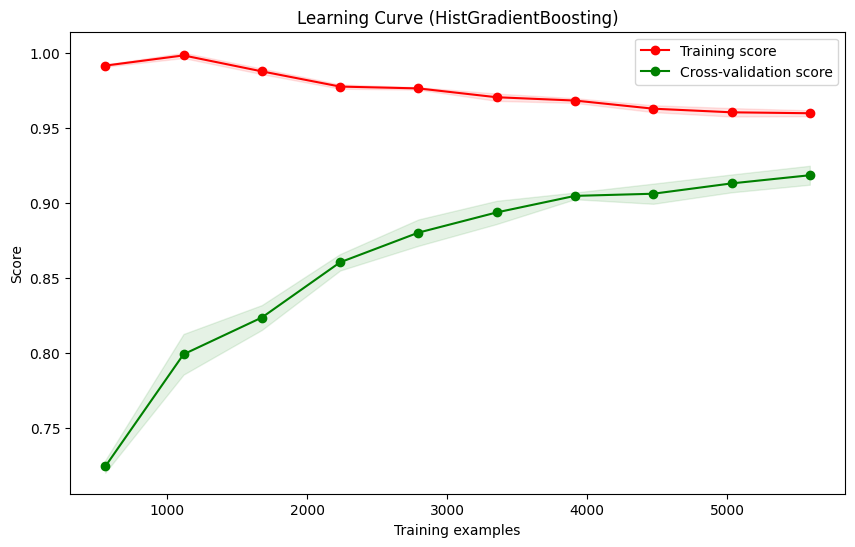

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9599427753934192, 0.9642346208869814, 0.9599427753934192, 0.9599427753934192, 0.9670958512160229, 0.9656652360515021, 0.9542203147353362, 0.9527896995708155, 0.9713467048710601, 0.9570200573065902]
Mean accuracy: 0.9612200810818565
95% confidence interval: (0.9570317098220122, 0.9654084523417008)


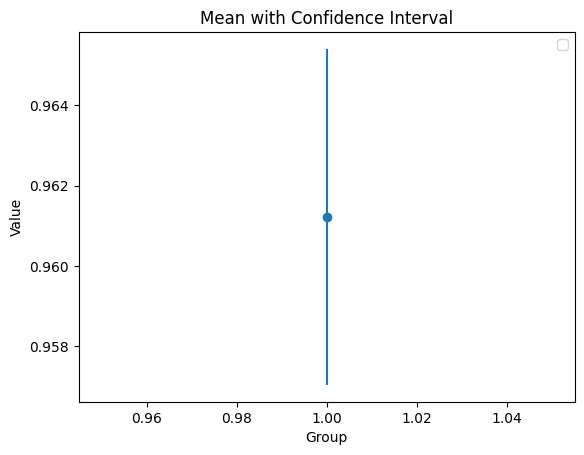

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')